## 情人节词云示例

### 1.引入相关的库包：

In [1]:
#coding:utf-8
__author__ = 'Hanxiaoyang'
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas   
import matplotlib.pyplot as plt

from wordcloud import WordCloud#词云包

### 2.导入大话西游txt文件，分词：

In [2]:
file=codecs.open(u"大话西游.txt",'r')
content=file.read()
file.close()
segment=[]
segs=jieba.cut(content) #切词，“么么哒”才能出现
for seg in segs:
    if len(seg)>1 and seg!='\r\n':
        segment.append(seg)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/pn/xp31896922n9rqxgftrqk3l00000gn/T/jieba.cache
Loading model cost 0.496 seconds.
Prefix dict has been built succesfully.


### 3.去停用词（“多喝热水”和闹嘴的小细节可以在这里抹去）

In [3]:
words_df=pandas.DataFrame({'segment':segment})
words_df.head()
stopwords=pandas.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'],encoding="utf8")
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

### 4.统计词频（情侣对话日常高频词）

In [4]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort(columns="计数",ascending=False)
words_stat

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,segment,计数
180,紫霞,80
193,至尊宝,52
112,悟空,18
140,月光宝盒,7
66,嘻嘻,6
11,上天,6
87,安排,5
184,老婆,4
60,告诉,4
173,真的,4


### 5.做词云（开启亮瞎眼么么哒模式）

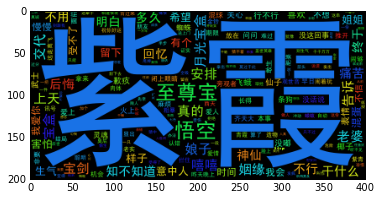

In [5]:
%matplotlib inline
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(words_stat.head(1000).itertuples(index=False))
plt.imshow(wordcloud)
plt.show()

In [6]:
%matplotlib
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(words_stat.head(1000).itertuples(index=False))
plt.imshow(wordcloud)
plt.show()

Using matplotlib backend: MacOSX


### 6.自定义背景图做词云（让他看到你的心）

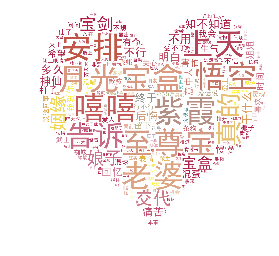

In [7]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(4000).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

In [10]:
%matplotlib
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(39769).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

Using matplotlib backend: MacOSX
